# Hands-on Pandas

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Review NumPy

In [2]:
# generate ndarray
# 1D vector
arr_v=np.arange(12)
# 2D Matrix
arr_m=np.arange(12).reshape(3,4) # 3 row 4 column matrix

In [3]:
print(f'arr_v={arr_v}\narr_m=\n{arr_m}')

arr_v=[ 0  1  2  3  4  5  6  7  8  9 10 11]
arr_m=
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### 與 list 比較一下，list 只有一維，多層仍是一維

In [4]:
# compare with list
lt_v=list(range(12))
lt_m=[[i+j*4 for i in range(4)] for j in range(3)]
print(f'lt_v={lt_v}\nlt_m={lt_m}')

lt_v=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
lt_m=[[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]]


## create Series and Dataframe with ndarray

#### 將一維的 ndarray 製備為 Pandas 的 Series 與 DataFrame

In [5]:
dsarv=pd.Series(arr_v)
dfarv=pd.DataFrame(arr_v)
print(dsarv,'\n',dfarv)

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
dtype: int32 
      0
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11


In [6]:
dfarm=pd.DataFrame(arr_m)
print(dfarm)

   0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


#### 將二維的 ndarray 製備為 DataFrame

### what if DF a list ?

In [7]:
dflt_v=pd.DataFrame(lt_v) # DF a 1D list
dflt_m=pd.DataFrame(lt_m) # DF a 2D list
print(dflt_v,'\n',dflt_m)

     0
0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
10  10
11  11 
    0  1   2   3
0  0  1   2   3
1  4  5   6   7
2  8  9  10  11


#### 多層 list DF 後，為多維 DF

## create a Dataframe for practise
### index with datetimes 

In [9]:
dates=pd.date_range('20190101',periods=6)
print(dates)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq='D')


### 兩種製備 DF 的方法

In [10]:
# way I
# pd.DataFrame(data,index,columns)
df1=pd.DataFrame(np.arange(24).reshape(6,4),index=dates,columns=list('ABCD'))
print(df1)

             A   B   C   D
2019-01-01   0   1   2   3
2019-01-02   4   5   6   7
2019-01-03   8   9  10  11
2019-01-04  12  13  14  15
2019-01-05  16  17  18  19
2019-01-06  20  21  22  23


In [11]:
# way II
# pd.DataFrame(dictionary)
df2=pd.DataFrame({'Date':dates,
                 'A':np.random.randn(6),
                 'B':1,
                 'C':list('abcaef'),
                 'D':'foo'})
print(df2)

        Date         A  B  C    D
0 2019-01-01  1.449253  1  a  foo
1 2019-01-02  0.797250  1  b  foo
2 2019-01-03  1.629079  1  c  foo
3 2019-01-04  1.410364  1  a  foo
4 2019-01-05  0.250228  1  e  foo
5 2019-01-06 -1.036748  1  f  foo


### assign a column as the index
### adjust the structure

In [12]:
df2=df2.set_index('Date')
print(df2)

                   A  B  C    D
Date                           
2019-01-01  1.449253  1  a  foo
2019-01-02  0.797250  1  b  foo
2019-01-03  1.629079  1  c  foo
2019-01-04  1.410364  1  a  foo
2019-01-05  0.250228  1  e  foo
2019-01-06 -1.036748  1  f  foo


In [13]:
del df2.index.name
print(df2)

                   A  B  C    D
2019-01-01  1.449253  1  a  foo
2019-01-02  0.797250  1  b  foo
2019-01-03  1.629079  1  c  foo
2019-01-04  1.410364  1  a  foo
2019-01-05  0.250228  1  e  foo
2019-01-06 -1.036748  1  f  foo


### pick up columns、index、data from a Dataframe

In [14]:
print(f'df2.Column:\n{df2.columns}\n')
print(f'df2.Index:\n{df2.index}\n')
print(f'df2.values:\n{df2.values}')

df2.Column:
Index(['A', 'B', 'C', 'D'], dtype='object')

df2.Index:
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06'],
              dtype='datetime64[ns]', freq=None)

df2.values:
[[1.4492533385647375 1 'a' 'foo']
 [0.7972497286194606 1 'b' 'foo']
 [1.6290791650874827 1 'c' 'foo']
 [1.4103639565323514 1 'a' 'foo']
 [0.2502276527647866 1 'e' 'foo']
 [-1.0367482758366098 1 'f' 'foo']]


### other df.command

In [15]:
df2.describe() # 只作用於數值欄位

,A,B
count,6.000000,6.0
mean,0.749904,1.0
std,1.014129,0.0
min,-1.036748,1.0
25%,0.386983,1.0
50%,1.103807,1.0
75%,1.439531,1.0
max,1.629079,1.0


In [16]:
df2

,A,B,C,D
2019-01-01,1.449253,1,a,foo
2019-01-02,0.797250,1,b,foo
2019-01-03,1.629079,1,c,foo
2019-01-04,1.410364,1,a,foo
2019-01-05,0.250228,1,e,foo
2019-01-06,-1.036748,1,f,foo


In [17]:
df2.T

,2019-01-01 00:00:00,2019-01-02 00:00:00,2019-01-03 00:00:00,2019-01-04 00:00:00,2019-01-05 00:00:00,2019-01-06 00:00:00
A,1.44925,0.79725,1.62908,1.41036,0.250228,-1.03675
B,1,1,1,1,1,1
C,a,b,c,a,e,f
D,foo,foo,foo,foo,foo,foo


In [18]:
df2.dtypes

A    float64
B      int64
C     object
D     object
dtype: object

In [19]:
df2

,A,B,C,D
2019-01-01,1.449253,1,a,foo
2019-01-02,0.797250,1,b,foo
2019-01-03,1.629079,1,c,foo
2019-01-04,1.410364,1,a,foo
2019-01-05,0.250228,1,e,foo
2019-01-06,-1.036748,1,f,foo


### sorting

In [20]:
df2

,A,B,C,D
2019-01-01,1.449253,1,a,foo
2019-01-02,0.797250,1,b,foo
2019-01-03,1.629079,1,c,foo
2019-01-04,1.410364,1,a,foo
2019-01-05,0.250228,1,e,foo
2019-01-06,-1.036748,1,f,foo


In [21]:
# sorted by index
# 'index' here implies either index or column,depends on axis setting 

df2.sort_index(axis=1,ascending=False) # axis=1: by column heads

,D,C,B,A
2019-01-01,foo,a,1,1.449253
2019-01-02,foo,b,1,0.797250
2019-01-03,foo,c,1,1.629079
2019-01-04,foo,a,1,1.410364
2019-01-05,foo,e,1,0.250228
2019-01-06,foo,f,1,-1.036748


In [22]:
df2.sort_index(axis=0,ascending=False) # axis=0: by row heads

,A,B,C,D
2019-01-06,-1.036748,1,f,foo
2019-01-05,0.250228,1,e,foo
2019-01-04,1.410364,1,a,foo
2019-01-03,1.629079,1,c,foo
2019-01-02,0.797250,1,b,foo
2019-01-01,1.449253,1,a,foo


In [23]:
# sorted by values
df2.sort_values(by='A')

,A,B,C,D
2019-01-06,-1.036748,1,f,foo
2019-01-05,0.250228,1,e,foo
2019-01-02,0.797250,1,b,foo
2019-01-04,1.410364,1,a,foo
2019-01-01,1.449253,1,a,foo
2019-01-03,1.629079,1,c,foo


In [ ]:
# murtiple sorting
df2.sort_values(by=['A','C']).sort_index(axis=1,ascending=False)

### slice

In [24]:
df1['A']

2019-01-01     0
2019-01-02     4
2019-01-03     8
2019-01-04    12
2019-01-05    16
2019-01-06    20
Freq: D, Name: A, dtype: int32

In [ ]:
df1.A

In [25]:
df1[['A','C']]

,A,C
2019-01-01,0,2
2019-01-02,4,6
2019-01-03,8,10
2019-01-04,12,14
2019-01-05,16,18
2019-01-06,20,22


In [26]:
df1[0:2]

,A,B,C,D
2019-01-01,0,1,2,3
2019-01-02,4,5,6,7


In [27]:
df1['20190101':'20190102']

,A,B,C,D
2019-01-01,0,1,2,3
2019-01-02,4,5,6,7


### Location Dice: df.loc[ ]

In [28]:
df1.loc['20190102':'20190104','A'] # slice row then column，both with headers，not index no.

2019-01-02     4
2019-01-03     8
2019-01-04    12
Freq: D, Name: A, dtype: int32

In [29]:
df1.loc[:,'A':'C']

,A,B,C
2019-01-01,0,1,2
2019-01-02,4,5,6
2019-01-03,8,9,10
2019-01-04,12,13,14
2019-01-05,16,17,18
2019-01-06,20,21,22


### position Dice: df.iloc[ ]

In [30]:
df2.iloc[2:3,1:4]

,B,C,D
2019-01-03,1,c,foo


In [31]:
df2.iloc[[2,4],[1,3]]

,B,D
2019-01-03,1,foo
2019-01-05,1,foo


### modify values

In [32]:
df1

,A,B,C,D
2019-01-01,0,1,2,3
2019-01-02,4,5,6,7
2019-01-03,8,9,10,11
2019-01-04,12,13,14,15
2019-01-05,16,17,18,19
2019-01-06,20,21,22,23


In [33]:
# by position
df1.iloc[2,2]=1111
df1.loc['20190102','B']=2222
df1

,A,B,C,D
2019-01-01,0,1,2,3
2019-01-02,4,2222,6,7
2019-01-03,8,9,1111,11
2019-01-04,12,13,14,15
2019-01-05,16,17,18,19
2019-01-06,20,21,22,23


In [34]:
# conditional
df1.loc[(df1.C>=6)&(df1.C<5),'C']=8888 # must use '&' instead 'and'
df1.A[df1.B>10]=np.nan
df1

,A,B,C,D
2019-01-01,0.0,1,2,3
2019-01-02,NaN,2222,6,7
2019-01-03,8.0,9,1111,11
2019-01-04,NaN,13,14,15
2019-01-05,NaN,17,18,19
2019-01-06,NaN,21,22,23


In [35]:
# stick new column
df1['F2']=[3,5,np.nan,12,np.nan,7,]
df1['F']=pd.Series([1,2,3,4,5,6],index=dates)

In [36]:
df1

,A,B,C,D,F2,F
2019-01-01,0.0,1,2,3,3.0,1
2019-01-02,NaN,2222,6,7,5.0,2
2019-01-03,8.0,9,1111,11,NaN,3
2019-01-04,NaN,13,14,15,12.0,4
2019-01-05,NaN,17,18,19,NaN,5
2019-01-06,NaN,21,22,23,7.0,6


In [39]:
# rearrange columns order
df1=df1[['A','B','C','D','F','F2']]
print(df1)

              A     B     C   D  F    F2
2019-01-01  0.0     1     2   3  1   3.0
2019-01-02  NaN  2222     6   7  2   5.0
2019-01-03  8.0     9  1111  11  3   NaN
2019-01-04  NaN    13    14  15  4  12.0
2019-01-05  NaN    17    18  19  5   NaN
2019-01-06  NaN    21    22  23  6   7.0


### replace and remove null

In [82]:
# create a Dataframe named df3
np.random.seed(50)
df3=pd.DataFrame(np.random.randint(1,200,48).reshape(6,8),columns=['A','B','C','D','a','b','c','d'])

In [83]:
df3

,A,B,C,D,a,b,c,d
0,177,140,110,34,133,71,71,23
1,134,3,96,72,112,197,164,93
2,92,155,135,149,44,32,50,86
3,107,170,65,7,148,131,80,159
4,106,164,27,61,116,67,68,131
5,11,111,180,1,94,95,1,140


In [84]:
df3[df3.iloc[:,:]<30]=np.nan

In [85]:
df3

,A,B,C,D,a,b,c,d
0,177.0,140.0,110.0,34.0,133,71,71.0,NaN
1,134.0,NaN,96.0,72.0,112,197,164.0,93.0
2,92.0,155.0,135.0,149.0,44,32,50.0,86.0
3,107.0,170.0,65.0,NaN,148,131,80.0,159.0
4,106.0,164.0,NaN,61.0,116,67,68.0,131.0
5,NaN,111.0,180.0,NaN,94,95,NaN,140.0


#### 計算各數值欄的 mean

In [86]:
df3.mean()

A    123.200000
B    148.000000
C    117.200000
D     79.000000
a    107.833333
b     98.833333
c     86.600000
d    121.800000
dtype: float64

In [66]:
df3

,A,B,C,D,a,b,c,d
0,166.0,184.0,157.0,181.0,36.0,98.0,103,33.0
1,181.0,NaN,147.0,NaN,92.0,NaN,113,NaN
2,NaN,30.0,86.0,38.0,68.0,109.0,96,33.0
3,183.0,170.0,NaN,99.0,NaN,39.0,175,64.0
4,138.0,104.0,97.0,94.0,72.0,193.0,141,196.0
5,93.0,125.0,167.0,NaN,101.0,126.0,126,82.0


#### 以欄的 mean 值取代空值

In [87]:
df3.fillna(df3.mean())

,A,B,C,D,a,b,c,d
0,177.0,140.0,110.0,34.0,133,71,71.0,121.8
1,134.0,148.0,96.0,72.0,112,197,164.0,93.0
2,92.0,155.0,135.0,149.0,44,32,50.0,86.0
3,107.0,170.0,65.0,79.0,148,131,80.0,159.0
4,106.0,164.0,117.2,61.0,116,67,68.0,131.0
5,123.2,111.0,180.0,79.0,94,95,86.6,140.0


In [88]:
df3

,A,B,C,D,a,b,c,d
0,177.0,140.0,110.0,34.0,133,71,71.0,NaN
1,134.0,NaN,96.0,72.0,112,197,164.0,93.0
2,92.0,155.0,135.0,149.0,44,32,50.0,86.0
3,107.0,170.0,65.0,NaN,148,131,80.0,159.0
4,106.0,164.0,NaN,61.0,116,67,68.0,131.0
5,NaN,111.0,180.0,NaN,94,95,NaN,140.0


In [89]:
df3.dropna(axis=0,how='any')
# how=['any','all']

,A,B,C,D,a,b,c,d
2,92.0,155.0,135.0,149.0,44,32,50.0,86.0


## combine datasets

In [90]:
# create two matrix fo4 two Dataframes with different shape
data1=np.arange(1,24,2).reshape(3,4)
data2=np.arange(2,25,2).reshape(4,3)

In [91]:
dfa=pd.DataFrame(data1,
                index=['a','b','c'],
                columns=list('ABCD'))

In [92]:
dfb=pd.DataFrame(data2,
                index=['b','c','d','e'],
                columns=['C','D','E'])

In [ ]:
dfa.shape

In [ ]:
dfb.shape

In [93]:
dfa

,A,B,C,D
a,1,3,5,7
b,9,11,13,15
c,17,19,21,23


In [94]:
dfb

,C,D,E
b,2,4,6
c,8,10,12
d,14,16,18
e,20,22,24


## connect datasets with pd.concat( )
### concatenate row over row, axis=0

In [154]:
pd_ror=pd.concat([dfa,dfb],axis=0)

In [ ]:
pd_ror

In [158]:
pd_ror=pd.concat([dfa,dfb],axis=0,join='inner',ignore_index=True)
# join=['outer','inner] default:outer

In [ ]:
pd_ror

### concatenate column by column, axis=1

In [160]:
df_cbc=pd.concat([dfa,dfb],axis=1)

In [ ]:
df_cbc

In [162]:
df_cbc=pd.concat([dfa,dfb],axis=1,join='inner')

In [ ]:
df_cbc

## relate datasets with pd.merge( )
### star schema: fact and dimension table

In [164]:
fact=pd.DataFrame(
        np.arange(1,17).reshape(8,2),
        columns=['c','d'])
fact['key']=['k0','k1','k0','k2','k3','k2','k3','k5']

In [ ]:
fact # multiple key value

In [166]:
dimension=pd.DataFrame(
        {'key':['k0','k1','k2','k3','k4'],
         'a':['a0','a1','a2','a3','a4'],
         'b':['b0','b1','b2','b3','b4']}
        )

In [ ]:
dimension # unique key value

In [173]:
res=pd.merge(fact,dimension, on='key')

In [ ]:
res

In [175]:
res=pd.merge(fact,dimension, on='key',how='left')
# how=['left','right','inner','out']

In [ ]:
res

In [177]:
res=pd.merge(fact,dimension, on='key',how='outer')

In [ ]:
res

# Pandas PLot
## usually used for data investigation
## rarely for presentation purpose
### line、bar、hist、box、scatter、pair

In [96]:
A=pd.Series(np.random.normal(5,1.2,250))

In [278]:
A.head()

0    4.428842
1    4.229362
2    5.913342
3    5.080352
4    4.955424
dtype: float64

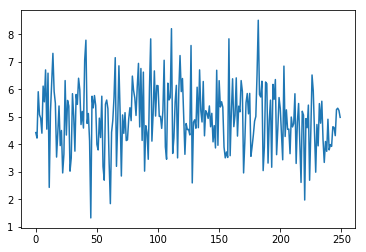

In [279]:
A.plot()

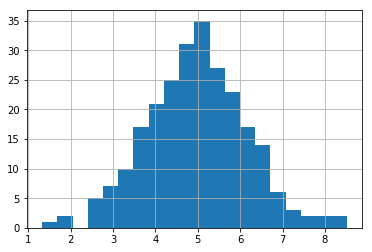

In [280]:
A.hist(bins=20)

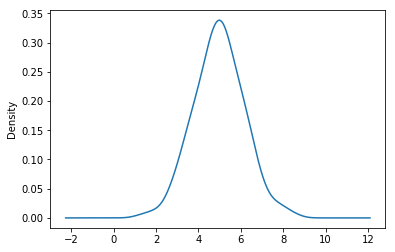

In [281]:
A.plot.kde() #Kernel Density Estimation

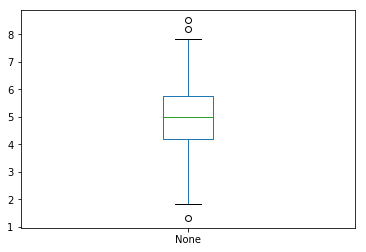

In [282]:
A.plot.box()

In [283]:
A.describe()

count    250.000000
mean       4.971377
std        1.188837
min        1.329146
25%        4.180138
50%        5.003579
75%        5.742743
max        8.509923
dtype: float64

In [97]:
B=pd.Series(np.random.randn(250).cumsum()) 
C=pd.Series(np.random.randint(100,200,250))
D=pd.Series(np.random.randint(1,6,250)) # category variable

Data=A.to_frame('A')
Data['B']=B
Data['C']=C
Data['D']=D

In [285]:
Data.head()

,A,B,C,D
0,4.428842,-0.164679,148,4
1,4.229362,0.461457,158,1
2,5.913342,0.163432,133,3
3,5.080352,1.086829,185,1
4,4.955424,1.961255,116,5


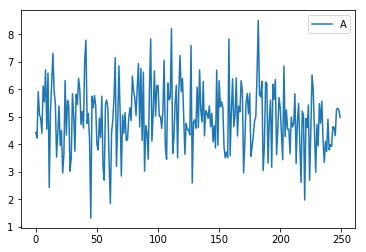

In [286]:
Data.plot(y='A',use_index=True);

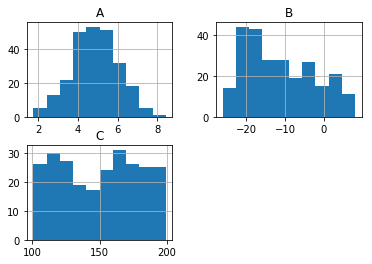

In [23]:
Data.hist(['B','A','C']);

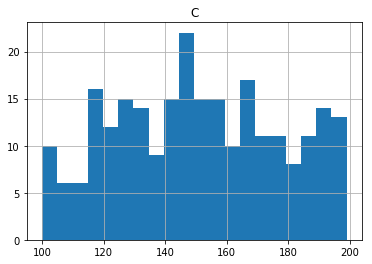

In [289]:
Data.hist('C',bins=20);

In [290]:
Data.C.describe()

count    250.000000
mean     150.888000
std       27.027048
min      100.000000
25%      128.000000
50%      149.500000
75%      171.750000
max      199.000000
Name: C, dtype: float64

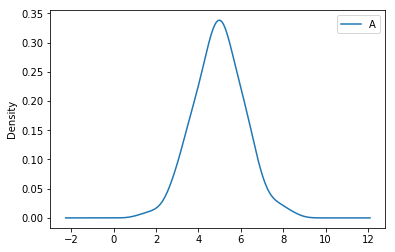

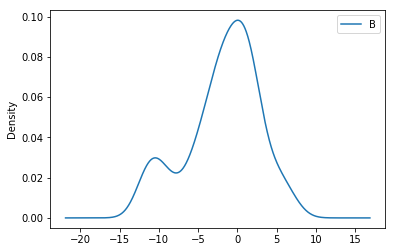

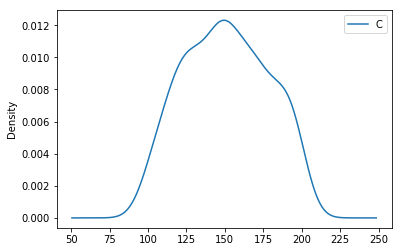

In [291]:
Data.plot.kde(y='A')
Data.plot.kde(y='B')
Data.plot.kde(y='C')

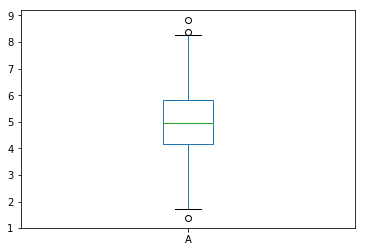

In [192]:
Data.plot.box(y='A')

In [7]:
Data.A.describe()

count    250.000000
mean       4.861131
std        1.165863
min        1.749156
25%        4.038181
50%        4.923779
75%        5.621082
max        8.435820
Name: A, dtype: float64

In [16]:
Data.describe()

,A,B,C,D
count,250.000000,250.000000,250.000000,250.000000
mean,4.861131,-11.159731,149.544000,3.136000
std,1.165863,9.032571,28.957524,1.421826
min,1.749156,-26.087723,101.000000,1.000000
25%,4.038181,-18.995230,123.000000,2.000000
50%,4.923779,-12.582805,152.000000,3.000000
75%,5.621082,-4.261458,173.000000,4.000000
max,8.435820,8.116270,199.000000,5.000000


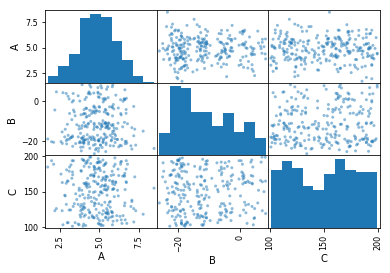

In [22]:
DataM=Data[['A','B','C']]
pd.plotting.scatter_matrix(DataM);

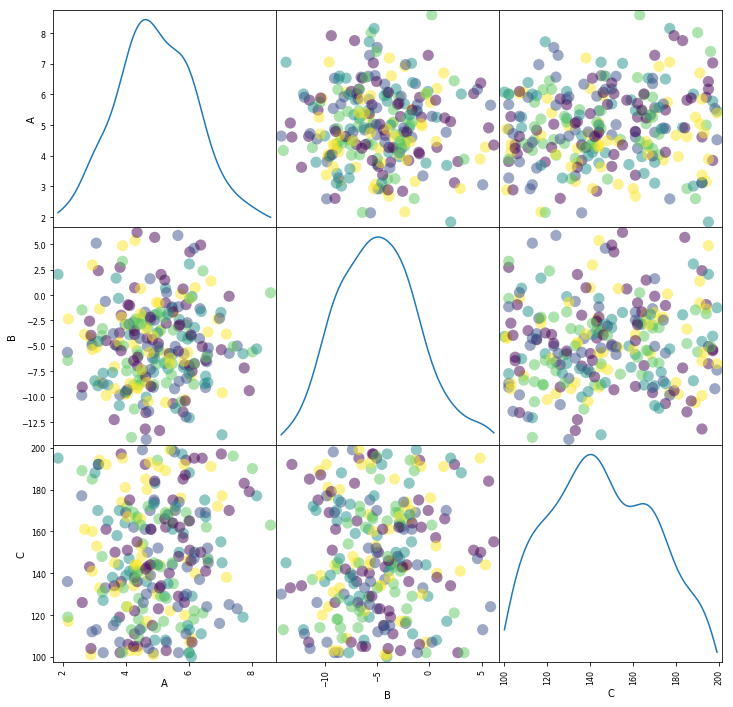

In [98]:
pd.plotting.scatter_matrix(Data[['A','B','C']],
                           c=Data.D,s=500,
                           diagonal='kde',figsize=(12,12)); #diagonal=['kde','hist']; s=size of marker

# import matplotlib.pyplot as plt
# plt.savefig('sample.png')

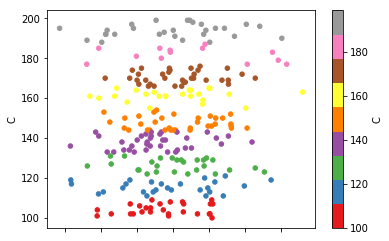

In [99]:
Data.plot.scatter(x='A',y='C',c='C',colormap='Set1'); # ref colormap > https://matplotlib.org/users/colormaps.html

### validate central limit theorem

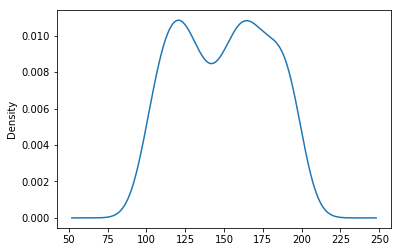

In [24]:
Data.C.plot.kde()

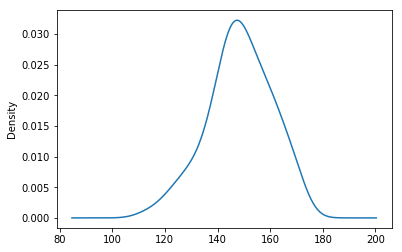

In [25]:

s=5 # sample size
n=100 # sampling times

CL=[]
for i in range(n):
    x=np.random.choice(C,s,replace=False)
    x=x.sum()/s
    CL.append(x)
    
CL=pd.Series(CL)
CL.plot.kde();

# End of Pandas basic practise